In [1]:
import sys
sys.path.append('Scripts')
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import path
from sklearn import preprocessing
import os
import gc

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

def read_data(dataframe):
    return pd.read_csv(dataframe['path'], names = range(1, 16+1), dtype = float)

Gramian Angular Field Script

In [ ]:
dataType = '512'
method = '512'
methodDict = {
    'Simple': ['Dados_BCI_Combinados', 'GAF_Combinados', 'Combined_'],
    'PCA': ['Dados_BCI_CombinadosPCA', 'GAF_PCA', 'PCA_'],
    'Full': ['Dados_BCI_FullDataset', 'GAF_FullDataset', 'FullDataset_'] # Problemático
}
dataPath = path('C:\\Users\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][0]+'\\'+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][1]+"\\"+dataType)

data = pd.read_csv('SSVEPDataset'+methodDict[method][2]+dataType+".csv")

gasf = GramianAngularField(image_size = 80, method = 'summation')
files = list(range(len(data)))
n = len(files)
newlist = list(range(0, len(data), n//5))
for k in range(1, len(newlist)):
    print("Part {} started.".format(k))
    for i in range(newlist[k-1], newlist[k]):
        sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
        if sample[0][1] != 0:
            X = gasf.fit_transform(sample)
            fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 12))
            plt.axis('off')
            im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

            state = str(data.loc[i]['state'])
            subject = str(data.loc[i]['subject'])
            if data.loc[i]['path'][-6] == '\\':
                file = data.loc[i]['path'][-5]
            else:
                file = data.loc[i]['path'][-6:-4]

            try:
                fig.savefig(figPath()+'\\'+state+'\\'+subject+'_'+file+".png", dpi = 200, bbox_inches = 'tight')
                plt.close()
            except:
                print("Error creating picture: {}".format(figPath()+'\\'+state+'\\'+subject+'_'+file+".png"))
    print("Part {} finished.".format(k))

***

Example

In [22]:
gasf = GramianAngularField(image_size = 80, method = 'summation')
X_gasf = gasf.fit_transform(sample)

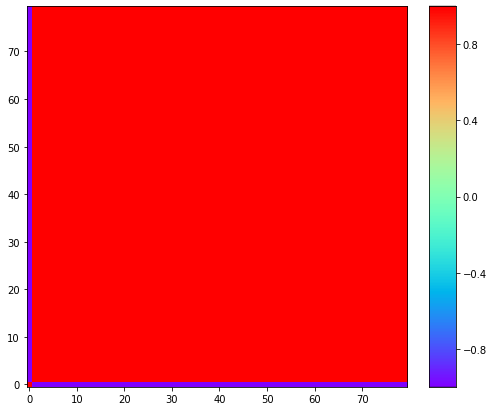

In [23]:
fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()